In [193]:
import os
import itertools
import warnings
import copy
warnings.filterwarnings('ignore')
import pickle as pkl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlens.ensemble import SuperLearner
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# initialize values
in_dir = 'input'
out_dir = 'output'
model_dir = 'model'
# print all filename present in directory
os.listdir(in_dir)

['data.csv', 'data1.csv', 'New Text Document.txt', 'xdata.csv']

In [10]:
# set the dataset file name here
data_fname = 'data1.csv'
cdata_fname = 'cleaned_data.csv'
train_data_fname = 'train.csv'
test_data_fname = 'test.csv'

In [11]:
data_file_path = os.path.join(in_dir,data_fname)
print("Input file path : "+data_file_path)

Input file path : input\data1.csv


In [12]:
data_as_frame = pd.read_csv(data_file_path)

In [13]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 12 columns):
V_count                1772 non-null int64
A_Day                  1772 non-null object
A_Time                 1772 non-null int64
Road_Type              1772 non-null object
Road_Surface           1772 non-null object
Lighting_Conditions    1772 non-null object
Weather_Conditions     1772 non-null object
Casualty_Class         1772 non-null object
Sex_of_Casualty        1772 non-null object
Age_of_Casualty        1772 non-null int64
Type_of_Vehicle        1772 non-null object
Casualty_Severity      1772 non-null object
dtypes: int64(3), object(9)
memory usage: 166.2+ KB


In [14]:
data_as_frame.shape

(1772, 12)

In [15]:
data_as_frame.dropna(axis=0,inplace=True)

In [16]:
data_as_frame.to_csv('data_new.csv',index=False)

In [17]:
data_as_frame.head()

V_count     A_Day  A_Time     Road_Type Road_Surface  \
0        2    Friday       3             A          Dry   
1        2  Saturday       1  Unclassified          Dry   
2        2    Friday       2  Unclassified          Dry   
3        2    Friday       4  Unclassified          Dry   
4        2    Friday       2             A   Wet / Damp   

                       Lighting_Conditions       Weather_Conditions  \
0  Darkness: street lights present and lit  Fine without high winds   
1  Darkness: street lights present and lit  Fine without high winds   
2          Daylight: street lights present  Fine without high winds   
3          Daylight: street lights present  Fine without high winds   
4          Daylight: street lights present  Fine without high winds   

                 Casualty_Class Sex_of_Casualty  Age_of_Casualty  \
0               Driver or rider            Male               38   
1               Driver or rider          Female               50   
2               Driver or rider            Male               26   
3  Vehicle or pillion passenger          Female               22   
4               Driver or rider            Male               57   

         Type_of_Vehicle Casualty_Severity  
0  Motorcycle over 500cc           Serious  
1                    Car            Slight  
2                    Car            Slight  
3                    Car            Slight  
4            Pedal cycle            Slight

In [18]:
data_as_frame.shape

(1772, 12)

In [19]:
data_as_frame.tail()

V_count   A_Day  A_Time     Road_Type Road_Surface  \
1767        1  Friday       3             A          Dry   
1768        1  Friday       2  Unclassified          Dry   
1769        1  Monday       2  Unclassified   Wet / Damp   
1770        1  Friday       3             A          Dry   
1771        1  Sunday       4             A   Wet / Damp   

                          Lighting_Conditions       Weather_Conditions  \
1767          Daylight: street lights present  Fine without high winds   
1768  Darkness: street lights present and lit  Fine without high winds   
1769  Darkness: street lights present and lit  Fine without high winds   
1770          Daylight: street lights present  Fine without high winds   
1771          Daylight: street lights present  Fine without high winds   

     Casualty_Class Sex_of_Casualty  Age_of_Casualty Type_of_Vehicle  \
1767     Pedestrian          Female               11             Car   
1768     Pedestrian            Male               31             Car   
1769     Pedestrian          Female               67             Car   
1770     Pedestrian          Female               42             Car   
1771     Pedestrian            Male               53             Car   

     Casualty_Severity  
1767           Serious  
1768           Serious  
1769           Serious  
1770           Serious  
1771           Serious

In [20]:
data_as_frame_backup = data_as_frame.copy()

# In above step
we have to write description of features

In [21]:
data_as_frame.columns

Index(['V_count', 'A_Day', 'A_Time', 'Road_Type', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Type_of_Vehicle',
       'Casualty_Severity'],
      dtype='object')

In [22]:
level = data_as_frame['Casualty_Severity'].unique()
print(level)

['Serious' 'Slight']


In [23]:
data_as_frame['Casualty_Severity'] = data_as_frame['Casualty_Severity'].replace(level, [0,1])

In [24]:
data_as_frame.head()

V_count     A_Day  A_Time     Road_Type Road_Surface  \
0        2    Friday       3             A          Dry   
1        2  Saturday       1  Unclassified          Dry   
2        2    Friday       2  Unclassified          Dry   
3        2    Friday       4  Unclassified          Dry   
4        2    Friday       2             A   Wet / Damp   

                       Lighting_Conditions       Weather_Conditions  \
0  Darkness: street lights present and lit  Fine without high winds   
1  Darkness: street lights present and lit  Fine without high winds   
2          Daylight: street lights present  Fine without high winds   
3          Daylight: street lights present  Fine without high winds   
4          Daylight: street lights present  Fine without high winds   

                 Casualty_Class Sex_of_Casualty  Age_of_Casualty  \
0               Driver or rider            Male               38   
1               Driver or rider          Female               50   
2               Driver or rider            Male               26   
3  Vehicle or pillion passenger          Female               22   
4               Driver or rider            Male               57   

         Type_of_Vehicle  Casualty_Severity  
0  Motorcycle over 500cc                  0  
1                    Car                  1  
2                    Car                  1  
3                    Car                  1  
4            Pedal cycle                  1

In [25]:
data_as_frame.isna().sum()

V_count                0
A_Day                  0
A_Time                 0
Road_Type              0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Casualty_Class         0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
Casualty_Severity      0
dtype: int64

In [26]:
data_as_frame.dropna(axis=0,inplace=True)

In [27]:
data_as_frame.isna().sum()

V_count                0
A_Day                  0
A_Time                 0
Road_Type              0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Casualty_Class         0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
Casualty_Severity      0
dtype: int64

In [28]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 12 columns):
V_count                1772 non-null int64
A_Day                  1772 non-null object
A_Time                 1772 non-null int64
Road_Type              1772 non-null object
Road_Surface           1772 non-null object
Lighting_Conditions    1772 non-null object
Weather_Conditions     1772 non-null object
Casualty_Class         1772 non-null object
Sex_of_Casualty        1772 non-null object
Age_of_Casualty        1772 non-null int64
Type_of_Vehicle        1772 non-null object
Casualty_Severity      1772 non-null int64
dtypes: int64(4), object(8)
memory usage: 180.0+ KB


In [29]:
data_as_frame.head()

V_count     A_Day  A_Time     Road_Type Road_Surface  \
0        2    Friday       3             A          Dry   
1        2  Saturday       1  Unclassified          Dry   
2        2    Friday       2  Unclassified          Dry   
3        2    Friday       4  Unclassified          Dry   
4        2    Friday       2             A   Wet / Damp   

                       Lighting_Conditions       Weather_Conditions  \
0  Darkness: street lights present and lit  Fine without high winds   
1  Darkness: street lights present and lit  Fine without high winds   
2          Daylight: street lights present  Fine without high winds   
3          Daylight: street lights present  Fine without high winds   
4          Daylight: street lights present  Fine without high winds   

                 Casualty_Class Sex_of_Casualty  Age_of_Casualty  \
0               Driver or rider            Male               38   
1               Driver or rider          Female               50   
2               Driver or rider            Male               26   
3  Vehicle or pillion passenger          Female               22   
4               Driver or rider            Male               57   

         Type_of_Vehicle  Casualty_Severity  
0  Motorcycle over 500cc                  0  
1                    Car                  1  
2                    Car                  1  
3                    Car                  1  
4            Pedal cycle                  1

In [30]:
data_as_frame_backup['Casualty_Severity'] = data_as_frame_backup['Casualty_Severity'].replace(level, [0,1])

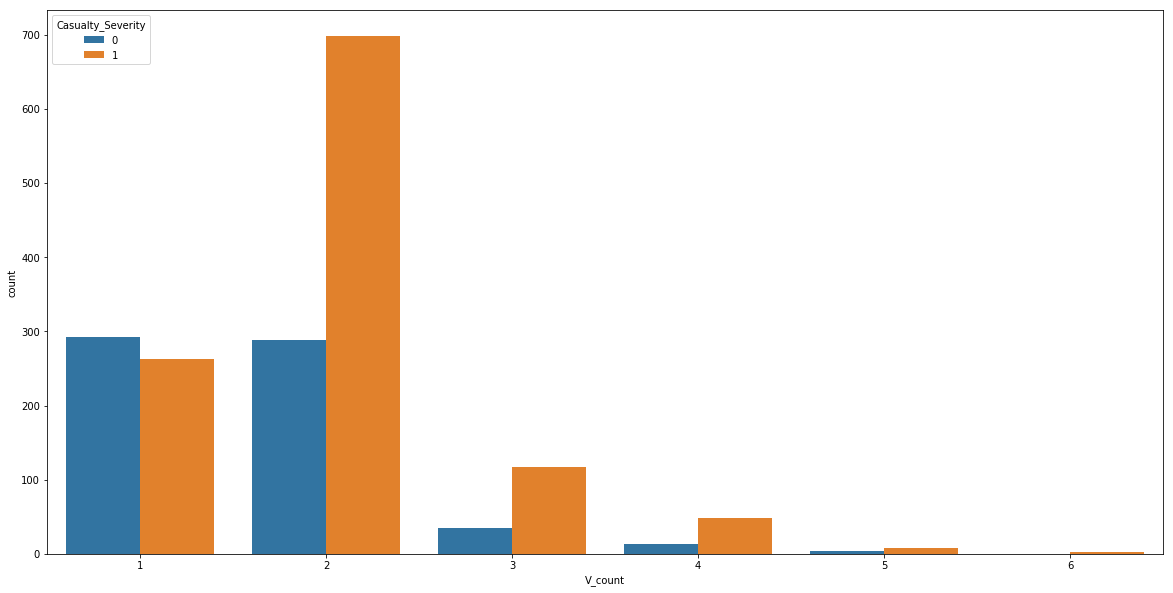

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

lm = sns.countplot(ax = ax,x="V_count", data=data_as_frame_backup,hue='Casualty_Severity')

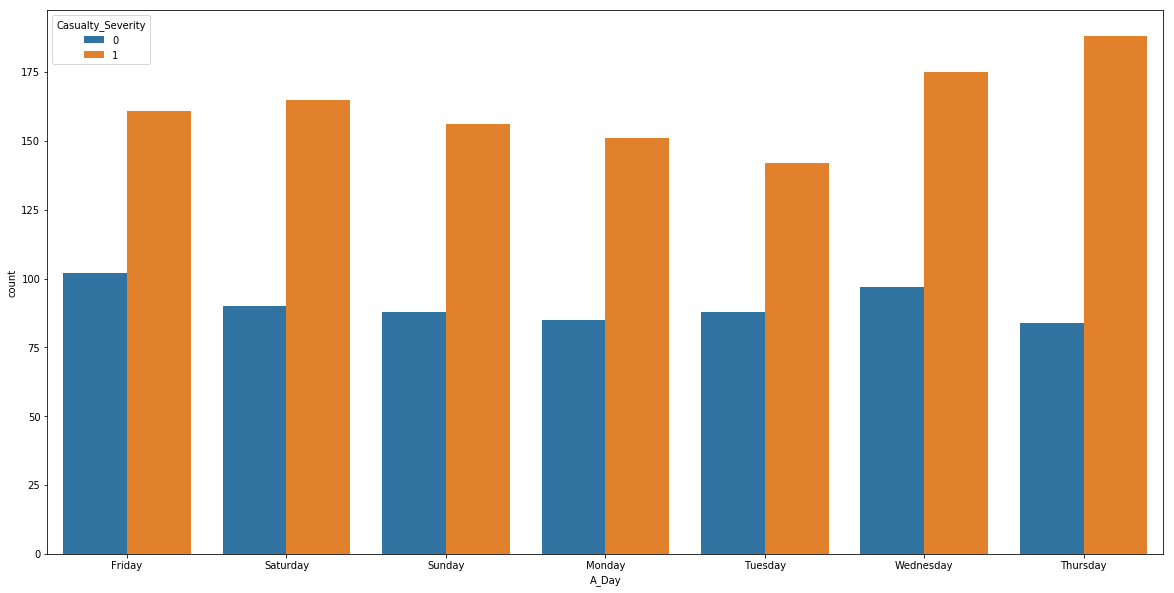

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

lm = sns.countplot(ax= ax,x="A_Day", data=data_as_frame_backup,hue='Casualty_Severity')

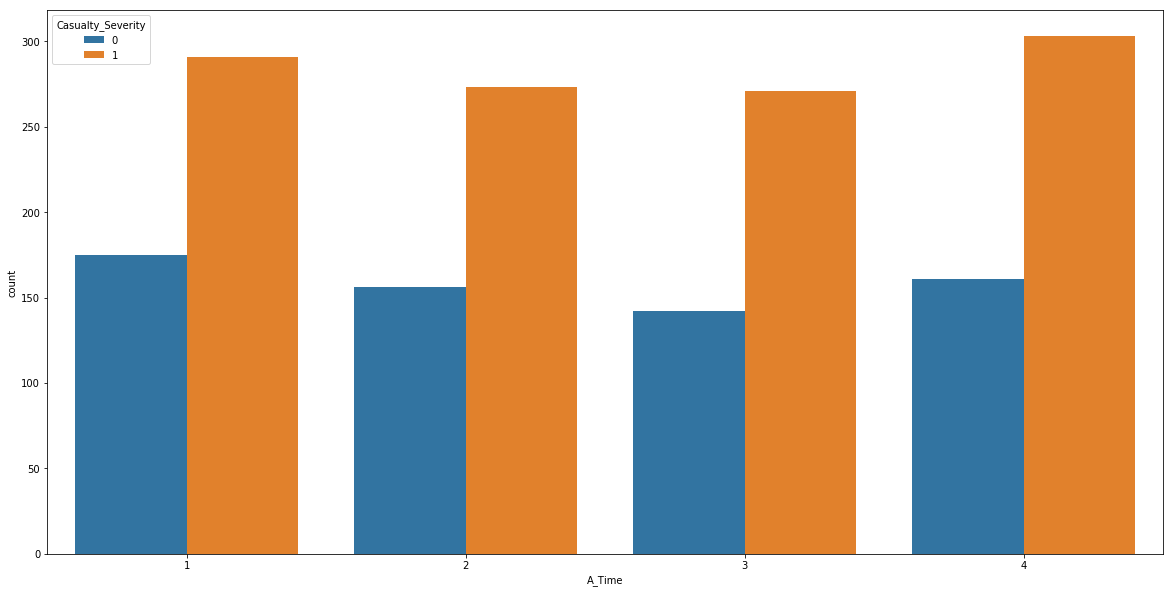

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
lm = sns.countplot(ax = ax,x="A_Time", data=data_as_frame_backup,hue='Casualty_Severity')

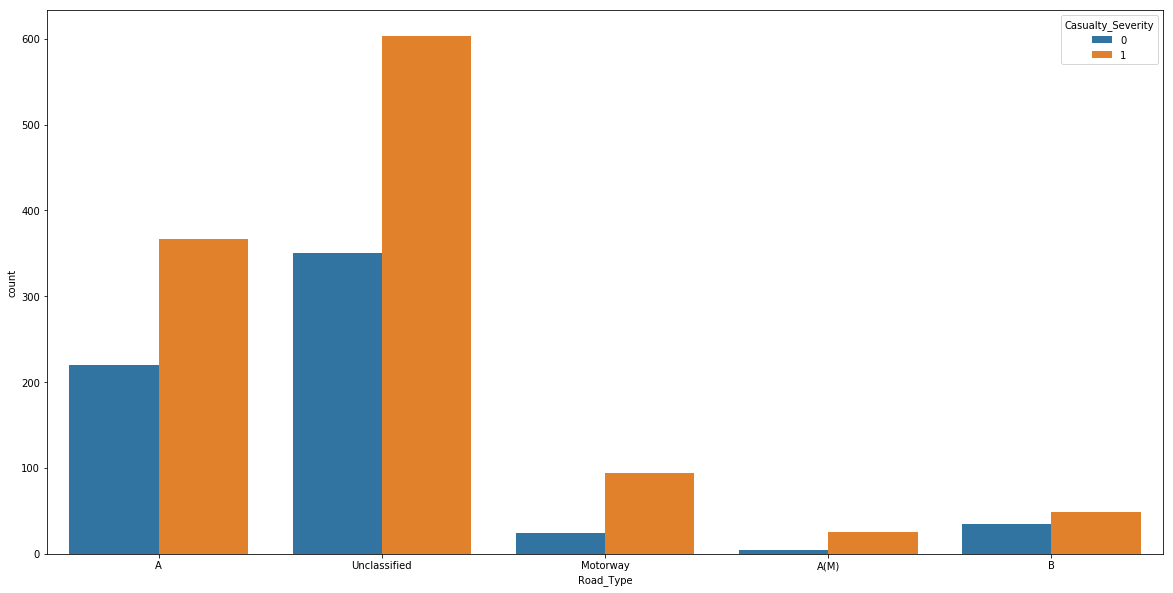

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
lm = sns.countplot(ax= ax,x="Road_Type", data=data_as_frame_backup,hue='Casualty_Severity')

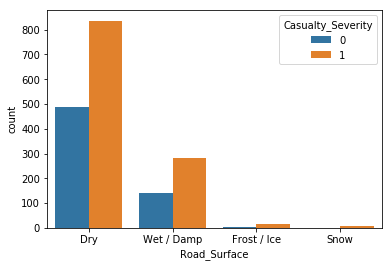

In [35]:

lm = sns.countplot(x="Road_Surface", data=data_as_frame_backup,hue='Casualty_Severity')

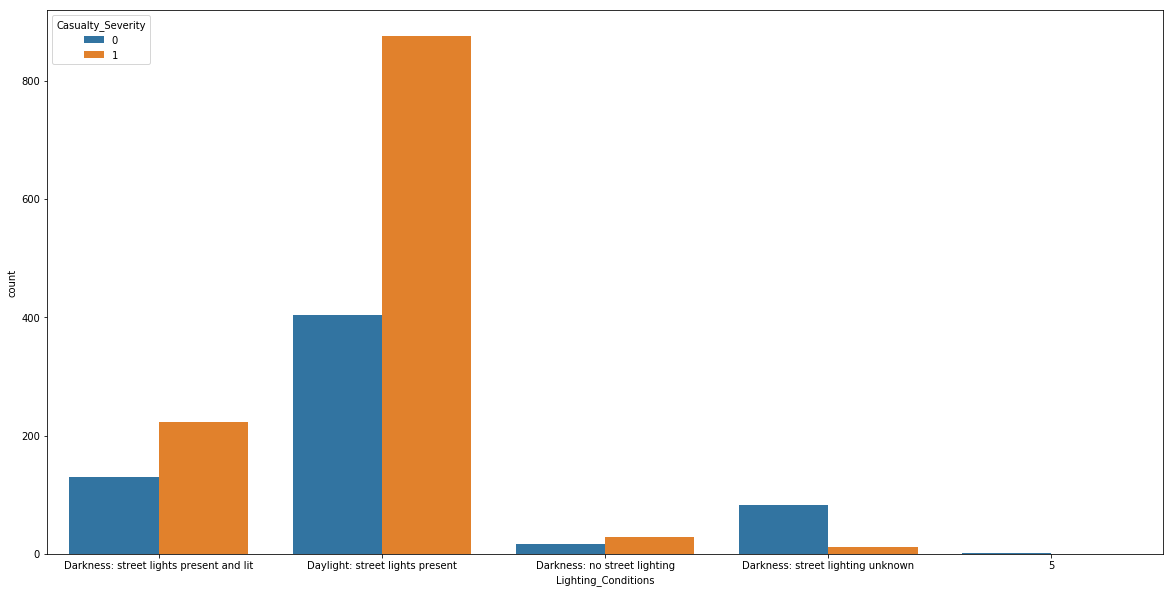

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
lm = sns.countplot(ax= ax,x="Lighting_Conditions", data=data_as_frame_backup,hue='Casualty_Severity')

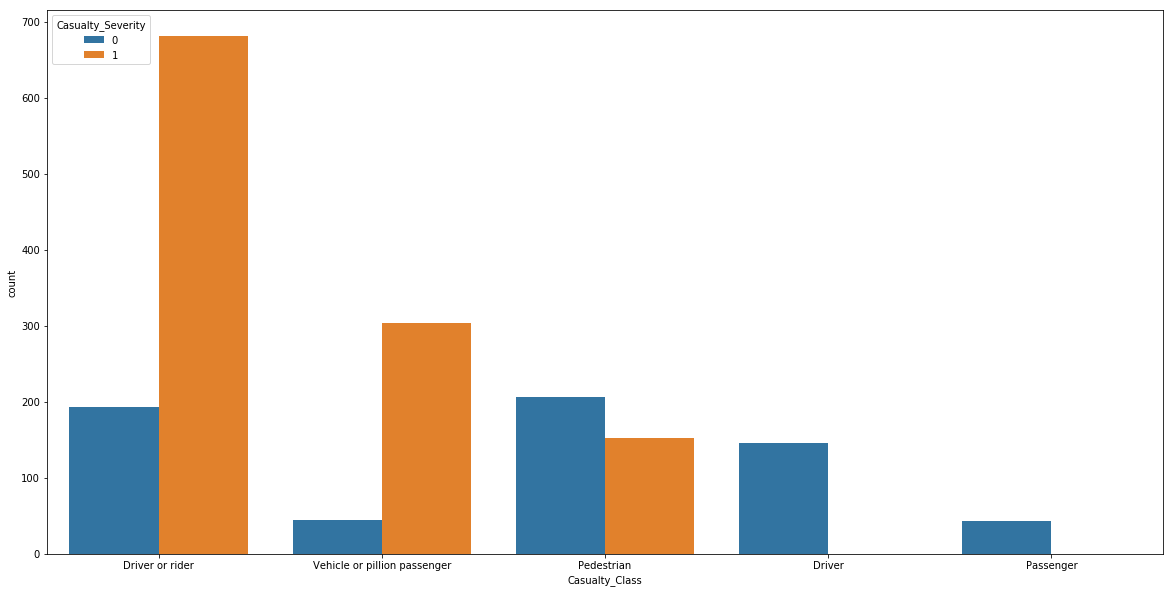

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

lm = sns.countplot(ax = ax,x="Casualty_Class", data=data_as_frame_backup,hue='Casualty_Severity')

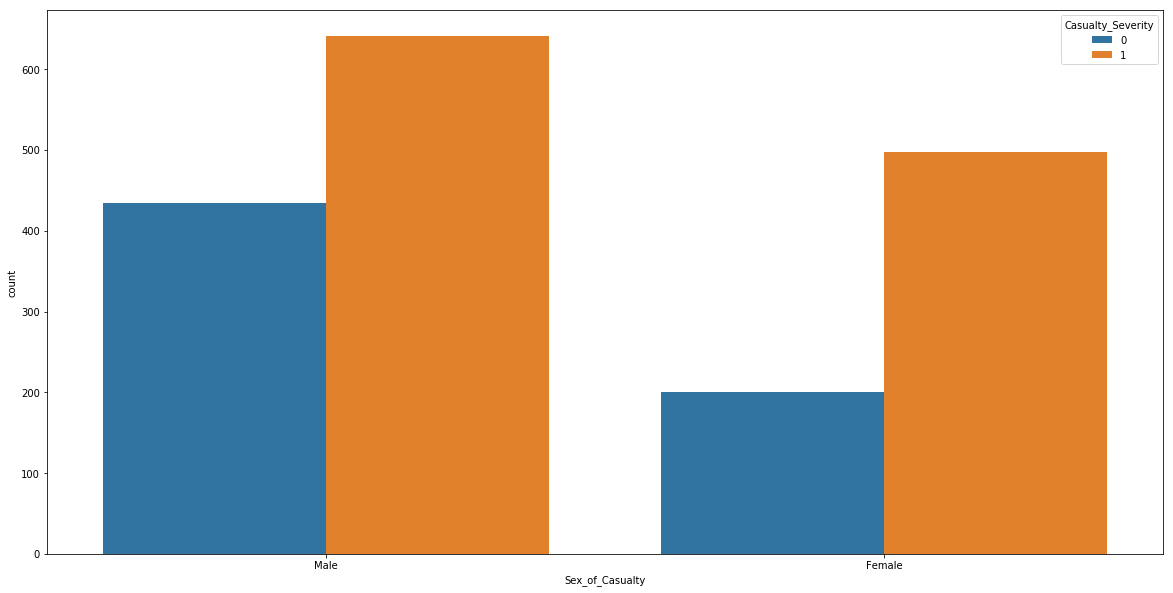

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
lm = sns.countplot(ax = ax,x="Sex_of_Casualty", data=data_as_frame_backup,hue='Casualty_Severity')

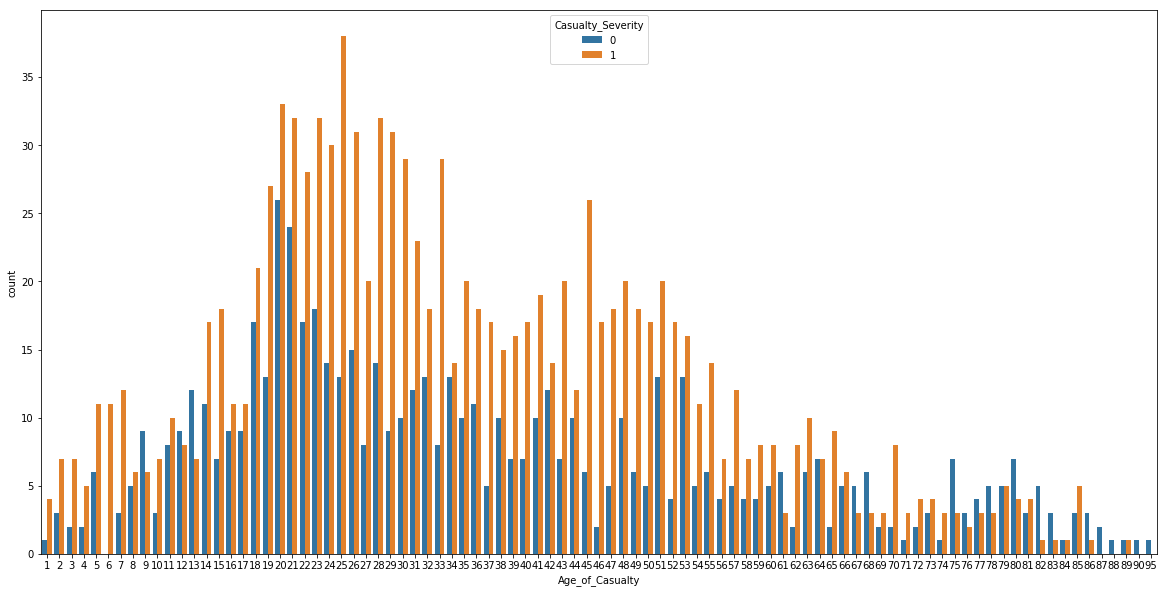

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
lm = sns.countplot(ax = ax,x="Age_of_Casualty", data=data_as_frame_backup,hue='Casualty_Severity')

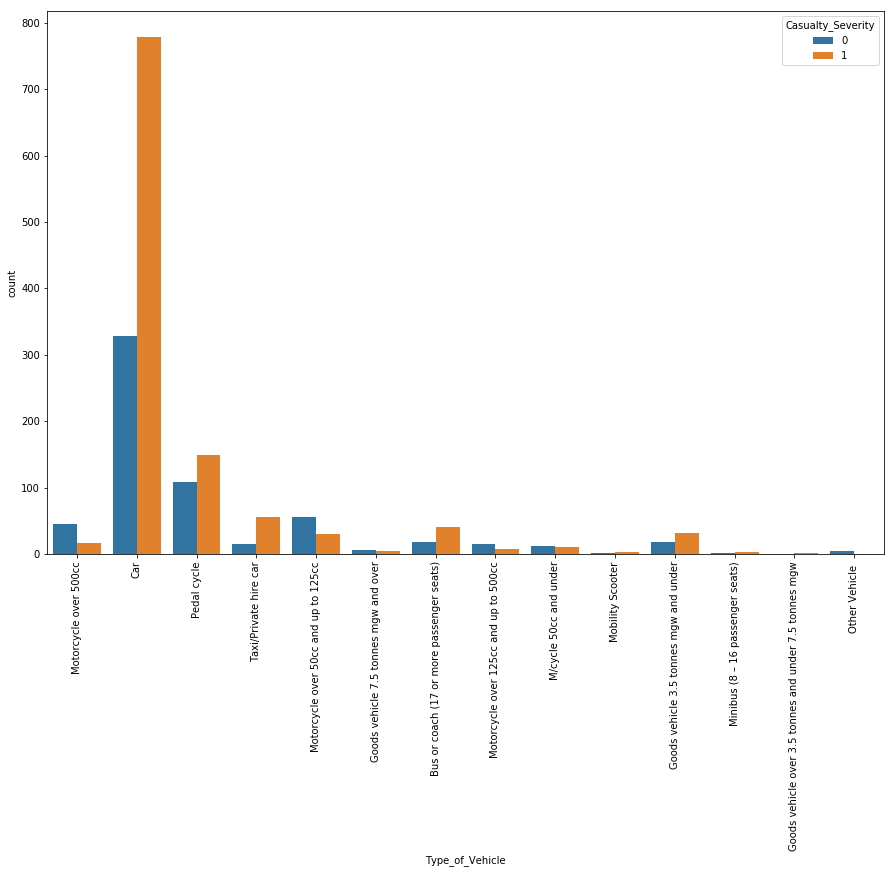

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
lm = sns.countplot(ax = ax,x="Type_of_Vehicle", data=data_as_frame_backup,hue='Casualty_Severity')

In [41]:
data_as_frame.A_Day = data_as_frame.A_Day.astype("category").cat.codes
data_as_frame.Road_Type = data_as_frame.Road_Type.astype("category").cat.codes
data_as_frame.Road_Surface = data_as_frame.Road_Surface.astype("category").cat.codes
data_as_frame.Lighting_Conditions = data_as_frame.Lighting_Conditions.astype("category").cat.codes
data_as_frame.Weather_Conditions = data_as_frame.Weather_Conditions.astype("category").cat.codes
data_as_frame.Casualty_Class = data_as_frame.Casualty_Class.astype("category").cat.codes
data_as_frame.Sex_of_Casualty = data_as_frame.Sex_of_Casualty.astype("category").cat.codes
#data_as_frame.Age_of_Casualty = data_as_frame.Age_of_Casualty.astype("category").cat.codes
data_as_frame.Type_of_Vehicle = data_as_frame.Type_of_Vehicle.astype("category").cat.codes

In [42]:
data_as_frame.head()

V_count  A_Day  A_Time  Road_Type  Road_Surface  Lighting_Conditions  \
0        2      0       3          0             0                    3   
1        2      2       1          4             0                    3   
2        2      0       2          4             0                    4   
3        2      0       4          4             0                    4   
4        2      0       2          0             3                    4   

   Weather_Conditions  Casualty_Class  Sex_of_Casualty  Age_of_Casualty  \
0                   1               1                1               38   
1                   1               1                0               50   
2                   1               1                1               26   
3                   1               4                0               22   
4                   1               1                1               57   

   Type_of_Vehicle  Casualty_Severity  
0                9                  0  
1                1                  1  
2                1                  1  
3                1                  1  
4               12                  1

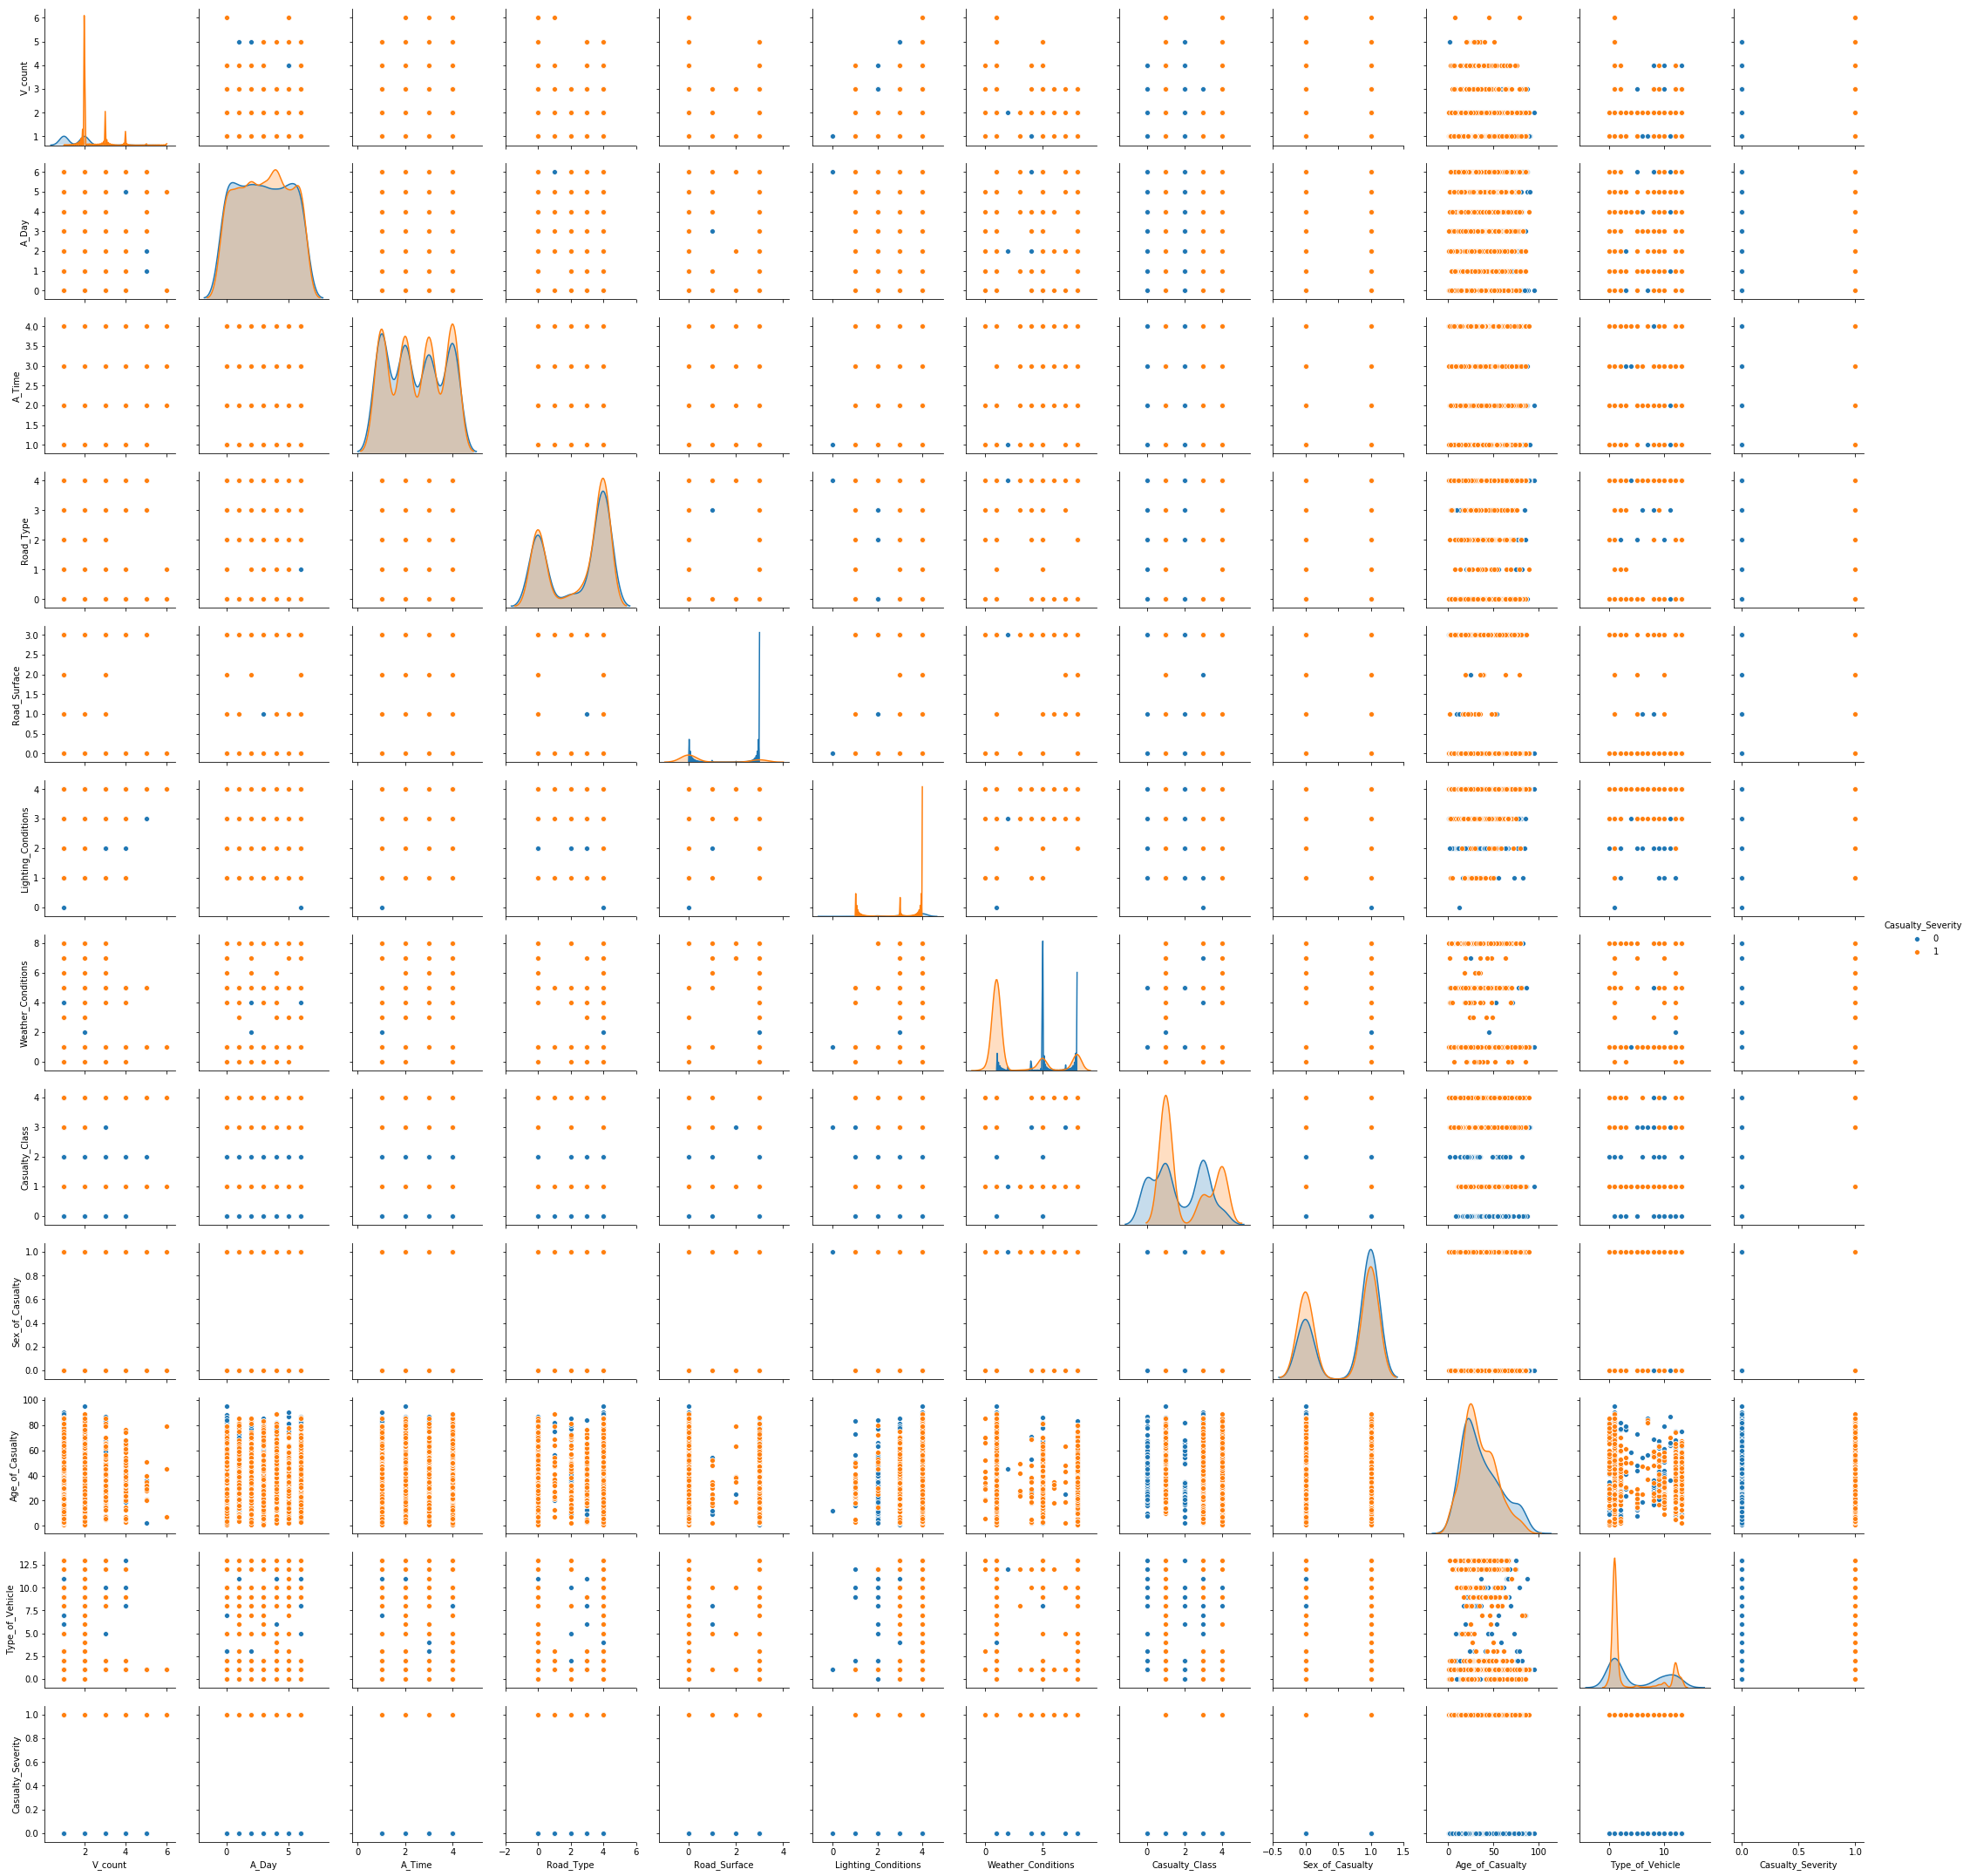

In [43]:
# Univariate Analysis
sns.pairplot(data= data_as_frame, hue='Casualty_Severity')

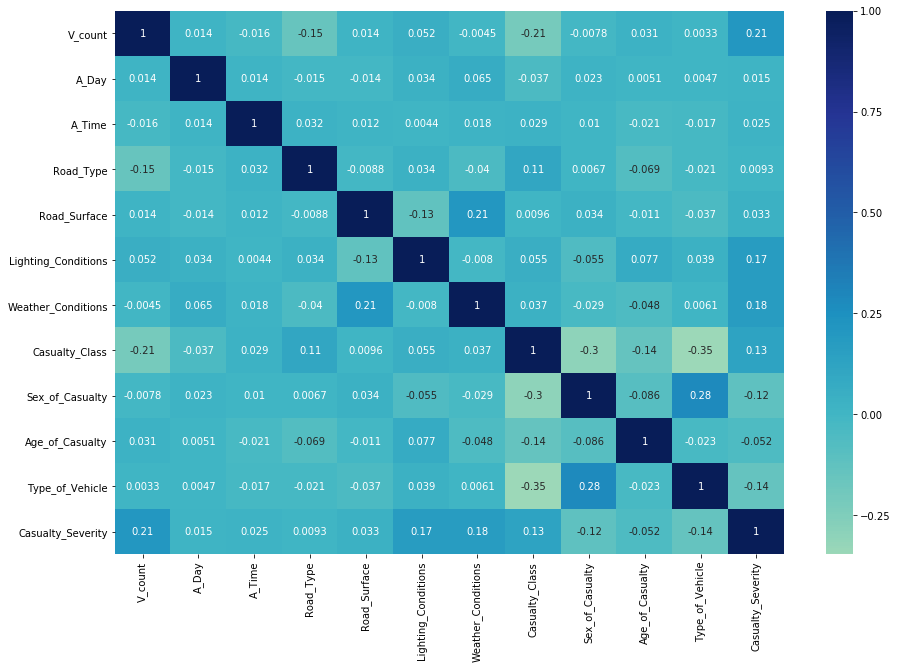

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data_as_frame.corr().values, annot=True, center=0, xticklabels=data_as_frame.columns,
               yticklabels=data_as_frame.columns, cmap='YlGnBu')
plt.show()

In [45]:
# group by Level to see the ratio
data_as_frame['Casualty_Severity'].value_counts()

1    1138
0     634
Name: Casualty_Severity, dtype: int64

In [46]:
# gives some infos on columns types and number of null values:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
    return tab_info

In [47]:
nullAnalysis(data_as_frame)

V_count A_Day A_Time Road_Type Road_Surface  \
column type        int64  int8  int64      int8         int8   
null values (nb)       0     0      0         0            0   
null values (%)        0     0      0         0            0   

                 Lighting_Conditions Weather_Conditions Casualty_Class  \
column type                     int8               int8           int8   
null values (nb)                   0                  0              0   
null values (%)                    0                  0              0   

                 Sex_of_Casualty Age_of_Casualty Type_of_Vehicle  \
column type                 int8           int64            int8   
null values (nb)               0               0               0   
null values (%)                0               0               0   

                 Casualty_Severity  
column type                  int64  
null values (nb)                 0  
null values (%)                  0

In [48]:
# save the cleaned data
cdata_file_path = os.path.join(out_dir,cdata_fname)
data_as_frame.to_csv(cdata_file_path)

In [49]:
X = data_as_frame.drop('Casualty_Severity', axis=1)
Y = data_as_frame['Casualty_Severity']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1417, 11) (1417,) (355, 11) (355,)


In [51]:
train_data = pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')

In [52]:
# to save train & test data
train_data.to_csv(os.path.join(out_dir,train_data_fname), index=False)
test_data.to_csv(os.path.join(out_dir,test_data_fname), index=False)

### Tain and Test data saved successfully in output directory

In [53]:
forest = RandomForestClassifier(n_estimators=30, random_state=42)

In [54]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
y_pred = forest.predict(x_test)

In [56]:
print(classification_report(y_true=y_test,y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.79      0.61      0.69       138
          1       0.78      0.90      0.84       217

avg / total       0.79      0.79      0.78       355



In [57]:
acc = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of random forest model using test-set is : %f" %(acc*100))

Overall accuracy of random forest model using test-set is : 78.591549


In [58]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

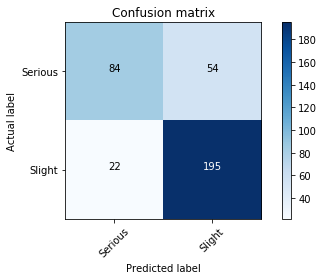

In [59]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm, level,title='Confusion matrix')

In [60]:
regression = LogisticRegression()

In [61]:
regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_log_pred = regression.predict(x_test)

In [63]:
print(classification_report(y_true=y_test,y_pred=y_log_pred))

             precision    recall  f1-score   support

          0       0.71      0.38      0.50       138
          1       0.70      0.90      0.78       217

avg / total       0.70      0.70      0.67       355



In [64]:
log_acc = accuracy_score(y_true=y_test, y_pred= y_log_pred)
print("Overall accuracy of Logistic Regression model using test-set is : %f" %(log_acc*100))

Overall accuracy of Logistic Regression model using test-set is : 69.859155


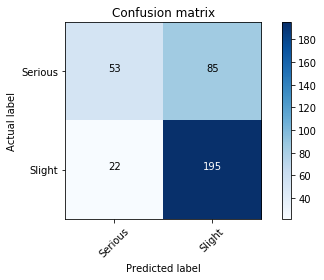

In [65]:
log_cm = confusion_matrix(y_true=y_test,y_pred=y_log_pred)
plot_confusion_matrix(log_cm, level,title='Confusion matrix')

In [66]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
y_pred_knn= KNN.predict(x_test)

In [68]:
print(classification_report(y_true=y_test,y_pred=y_log_pred))

             precision    recall  f1-score   support

          0       0.71      0.38      0.50       138
          1       0.70      0.90      0.78       217

avg / total       0.70      0.70      0.67       355



In [69]:
KNN_acc = accuracy_score(y_true=y_test, y_pred= y_pred_knn)
print("Overall accuracy of Logistic Regression model using test-set is : %f" %(KNN_acc*100))

Overall accuracy of Logistic Regression model using test-set is : 66.478873


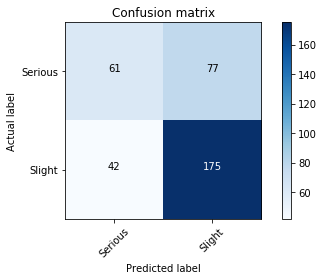

In [70]:
knn_cm = confusion_matrix(y_true=y_test,y_pred=y_pred_knn)
plot_confusion_matrix(knn_cm, level,title='Confusion matrix')

In [71]:
for i in range(1,13):
   
    clf = LogisticRegression(random_state = 0)
    df_bkp = copy.deepcopy(data_as_frame)

    y=df_bkp['Casualty_Severity']
    X=df_bkp.loc[:, df_bkp.columns != 'Casualty_Severity']

    rfe = RFE(clf, i)
    rfe = rfe.fit(X,y)
    
    rfe_support = rfe.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature)
    print("\n")
    X = df_bkp[rfe_feature]
    y = df_bkp['Casualty_Severity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#----------------------------------------------------------------------------------------------------------------------
    clf = LogisticRegression(random_state = 0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('Logistic Regressor')
    print("accuracy = "+str(accuracy))
    print("confusion matrix = \n "+ str(cm))
    print('\n\n')

#----------------------------------------------------------------------------------------------------------------------
    
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('KNN')
    print("accuracy = "+str(accuracy))
    print("confusion matrix = \n "+ str(cm))
    print("\n\n")

#----------------------------------------------------------------------------------------------------------------------
''' clf = RandomForestClassifier(n_estimators=30, random_state=42)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('Random Forest')
    print("accuracy = "+str(accuracy))
    print("confusion matrix = \n "+ str(cm))
    print("\n\n")'''
print("------------------------------------------------------\n\n")    

1 selected features
['V_count']


Logistic Regressor
accuracy = 0.6535211267605634
confusion matrix = 
 [[  0 123]
 [  0 232]]



KNN
accuracy = 0.6535211267605634
confusion matrix = 
 [[  0 123]
 [  0 232]]



2 selected features
['V_count', 'Sex_of_Casualty']


Logistic Regressor
accuracy = 0.6676056338028169
confusion matrix = 
 [[ 41  82]
 [ 36 196]]



KNN
accuracy = 0.6535211267605634
confusion matrix = 
 [[  0 123]
 [  0 232]]



3 selected features
['V_count', 'Lighting_Conditions', 'Sex_of_Casualty']


Logistic Regressor
accuracy = 0.6788732394366197
confusion matrix = 
 [[ 27  96]
 [ 18 214]]



KNN
accuracy = 0.6704225352112676
confusion matrix = 
 [[ 46  77]
 [ 40 192]]



4 selected features
['V_count', 'Lighting_Conditions', 'Casualty_Class', 'Sex_of_Casualty']


Logistic Regressor
accuracy = 0.6873239436619718
confusion matrix = 
 [[ 35  88]
 [ 23 209]]



KNN
accuracy = 0.7661971830985915
confusion matrix = 
 [[ 67  56]
 [ 27 205]]



5 selected features
['V_count', 'Li

In [72]:
feature= ['V_count', 'Lighting_Conditions', 'Weather_Conditions', 'Casualty_Class', 'Sex_of_Casualty', 'Type_of_Vehicle']
 
X = data_as_frame[feature]
y = data_as_frame['Casualty_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Logistic Regressor
accuracy = 0.7323943661971831


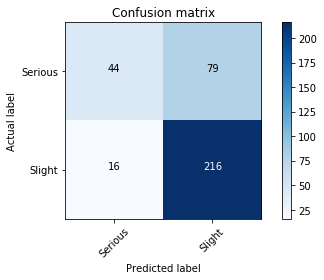

In [73]:
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
print('Logistic Regressor')
accuracy = accuracy_score(y_test, y_pred)

print("accuracy = "+str(accuracy))

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm, level,title='Confusion matrix')
cm = confusion_matrix(y_test, y_pred)

KNN
accuracy = 0.7690140845070422


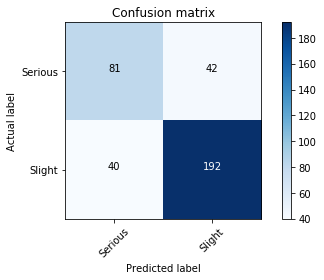

In [74]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('KNN')
print("accuracy = "+str(accuracy))

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm, level,title='Confusion matrix')
cm = confusion_matrix(y_test, y_pred)

Random Forest
accuracy = 0.7943661971830986


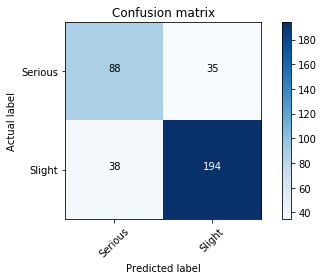

In [75]:
clf = RandomForestClassifier(n_estimators=30, random_state=42)
    
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest')
print("accuracy = "+str(accuracy))

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm, level,title='Confusion matrix')
cm = confusion_matrix(y_test, y_pred)

In [76]:
# 6. Find and plot the best value for k
n_neighbors = np.arange(1, 100, 1)
n_neighbors

accuracies = []
k_val = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    k_val.append(n)
a = list(zip(k_val,accuracies))
a[:10]

[(1, 0.7183098591549296),
 (2, 0.6985915492957746),
 (3, 0.7464788732394366),
 (4, 0.7323943661971831),
 (5, 0.7690140845070422),
 (6, 0.7830985915492957),
 (7, 0.7887323943661971),
 (8, 0.7746478873239436),
 (9, 0.7690140845070422),
 (10, 0.7577464788732394)]

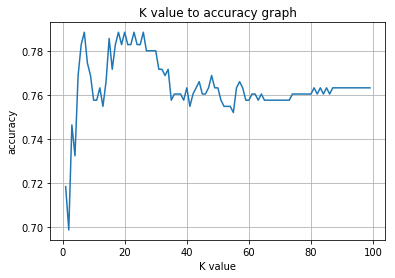

In [77]:
plt.xlabel("K value")
plt.ylabel("accuracy")
plt.grid(True)
plt.title("K value to accuracy graph")
plt.plot(k_val,accuracies)

In [197]:
seed = 1000
# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=accuracy_score, random_state=seed, verbose=2)

# Build the first layer
ensemble.add([RandomForestClassifier(random_state=1000), LogisticRegression()])

# Attach the final meta estimator
ensemble.add_meta(KNeighborsClassifier())

# --- Use ---

# Fit ensemble
ensemble.fit(X_train, y_train)

# Predict
preds = ensemble.predict(X_test)


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [198]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  logisticregression           0.68     0.01  0.01  0.00  0.00  0.00
layer-1  randomforestclassifier       0.77     0.02  0.06  0.00  0.01  0.00



In [199]:
print("Prediction score: %.3f" % accuracy_score(preds, y_test))

Prediction score: 0.797
